**<font  size=6>Day 22: Binary Search Trees</font>**


**Objective**  
Today, we're working with Binary Search Trees (BSTs). Check out the Tutorial tab for learning materials and an instructional  
video!

**Task**  
The height of a binary search tree is the number of edges between the tree's root and its furthest leaf. You are given a pointer,  
$root$ , pointing to the root of a binary search tree. Complete the getHeight function provided in your editor so that it returns the  
height of the binary search tree.

**Input Format**

The locked stub code in your editor reads the following inputs and assembles them into a binary search tree:  
The first line contains an integer, $n$ , denoting the number of nodes in the tree.  
Each of the $n$ subsequent lines contains an integer, $data$ , denoting the value of an element that must be added to the BST.

**Output Format**

The locked stub code in your editor will print the integer returned by your getHeight function denoting the height of the BST.

Sample Input

7  
3  
5  
2  
1  
4  
6  
7  

Sample Output  
  
3  

**Explanation**

The input forms the following BST:

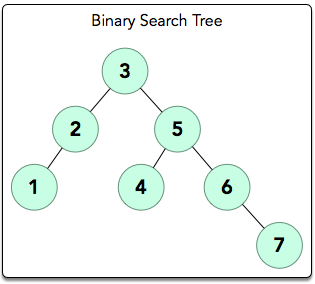

In [14]:
Image('./Day_22_image1.png')

The longest root-to-leaf path is shown below:

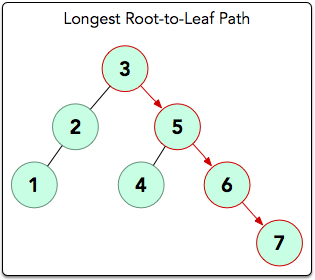

In [15]:
Image('./Day_22_image2.png')

There are $4$ nodes in this path that are connected by $3$ edges, meaning our BST's $height = 3$. Thus, we print $3$ as our answer.

**<font  size=5>題目解析</font>**

In [13]:
from pycallgraph import PyCallGraph
from pycallgraph import Config
from pycallgraph.output import GraphvizOutput
%matplotlib inline
from IPython.display import Image


In [ ]:
#運行可視化
def main():
    graphviz = GraphvizOutput()
    graphviz.output_file ='regexp2.png'
    with PyCallGraph(output=graphviz):
       #你要跑的代碼
       pass

if __name__ =='__main__':
    main()

這一題希望我們完成一個可以用於計算二元搜索樹(Binary Search Tree)高度的getHeight方法。  

**二元搜尋樹**（英語：Binary Search Tree），也稱為**有序二元樹**（ordered binary tree）或**排序二元樹**（sorted binary tree）  
，是指一棵空樹或者具有下列性質的二元樹：
1. 若任意節點的左子樹不空，則左子樹上所有節點的值均小於它的根節點的值；
2. 若任意節點的右子樹不空，則右子樹上所有節點的值均大於它的根節點的值；
3. 任意節點的左、右子樹也分別為二元搜尋樹；

我們來看題目內建的代碼是如何架構一個二元搜索樹的，這題會用到大量的遞歸結構，我們嘗試使用可視化運行，方便了解整個結構:

In [14]:
class Node:#建立一個Node的class
    def __init__(self,data):
        self.right=self.left=None #左右分支都是None
        self.data = data #Node的值為data
class Solution:
    def insert(self,root,data):#建立一個插入值的方法
        if root==None:#如果root為None
            return Node(data)#返回Node(data)
        else:
            if data<=root.data:#如果root.data 大於data
                cur=self.insert(root.left,data)#(1)#將data插入到root的左邊
                root.left=cur
            else:
                cur=self.insert(root.right,data)#(2)#將data插入到root的右邊
                root.right=cur
        return root

接著我們解釋一下運行時每次遞歸做了什麼(第一次講遞歸，會解釋的仔細一點):

In [15]:
T=int(input())#輸入個數
myTree=Solution()#實例化
root=None#定義root=None
for i in range(T):#下面講解
    data=int(input())
    root=myTree.insert(root,data)

for 循環的拆解:
1. 輸入data = 3，調用insert方法，目前root = None，因此返回Node(3)，將root付值為Node(3)。
2. 輸入data = 5，調用insert方法，目前root = Node(3)，root.right = root.left = None，因(root.data = 3) <= (data = 5)，執行上面的#(2)，這邊root.right = None，因此#(2)返回Node(5)，將#(2)返回的Node(5)付值給root.right，並返回root.
3. 輸入data = 2，調用insert方法，目前root = Node(3)，root.right = Node(5)，root.left = None，因(root.data = 3) >= (data = 2)，執行上面的#(1)，這邊root.left = None，因此#(1)返回Node(2)，將#(1)返回的Node(2)付值給root.left，並返回root.
4. 輸入data = 1，調用insert方法，目前root = Node(3)，root.right = Node(5)，root.left = Node(2)，因(root.data = 3) >= (data = 1)，執行上面的#(1)，這邊root.left = Node(2)，因此#(1)調用insert方法，#(1)中的#(1)root = root.left = Node(2), #(1)root.left = #(1)root.right = None ，因(root.data = 2) >= (data = 1)，執行#(1)#(1)，這邊#(1)root.left = None，因此#(1)#(1)返回Node(1)，將#(1)#(1)返回的Node(1)付值給#(1)root.left，並返回root.
5. 輸入data = 4，調用insert方法，目前root = Node(3)，root.right = Node(5)，root.left = Node(2)，(root.left).left = Node(1)，依此類推...


for循環結束後我們就有以下的樹:

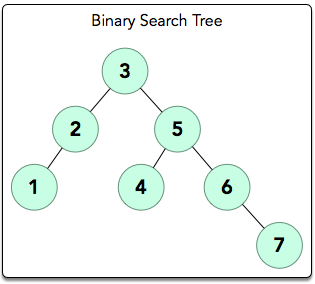

In [16]:
Image('./Day_22_image1.png')

從運行可視化中，我們可以看到，insert被__main__調用了7次(例如:輸入data = 3，**調用**insert方法)，也就是循環中的root=myTree.insert(root,data)七次調用。在這7次調用中都，內部總共遞歸了11次，分別是:
1. 輸入3，0次遞歸
2. 輸入5，1次遞歸#(2)
3. 輸入2，1次遞歸#(1)
4. 輸入1，2次遞歸#(1)#(1)
5. 輸入4，2次遞歸#(2)#(1)
6. 輸入6，2次遞歸#(2)#(2)
7. 輸入7，3次遞歸#(2)#(2)#(2)

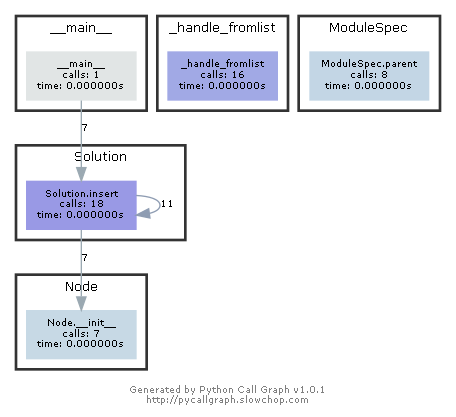

In [17]:
Image('./Day_22_regexp1.png')

In [ ]:
height=myTree.getHeight(root)#最後題目會調用getHeight函數
print(height)       

講完遞歸開始做題吧!


In [2]:
def getHeight(self,root):
    #Write your code here
    if not root:#如果root = None 返回-1
        return -1
    return max(1 + self.getHeight(root.left), 1 + self.getHeight(root.right))

為了好理解我們先講單邊，假設return 1 + self.getHeight(root.right)，遞歸是如何運行的呢?

root = Node(3)，返回1+(root =Node(5),返回1+(root = Node(6)，返回1+(root = Node(7)，返回(1+(root = None，返回-1)))))

因此，return 出的值為 3。推廣到max(1 + self.getHeight(root.left), 1 + self.getHeight(root.right))，就是我們把所有分支都試一次找最大的。

運行可視化中我們可以看到，__main__調用了1次，內部遞歸了14次，分別是，每個節點各兩次。


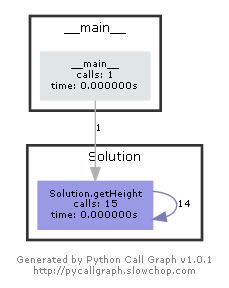

In [18]:
Image('./Day_22_regexp2.png')

一次跑起來

In [12]:
class Node:
    def __init__(self,data):
        self.right=self.left=None
        self.data = data
class Solution:
    def insert(self,root,data):
        if root==None:
            return Node(data)
        else:
            if data<=root.data:
                cur=self.insert(root.left,data)
                root.left=cur
            else:
                cur=self.insert(root.right,data)
                root.right=cur
        return root

    def getHeight(self,root):
        #Write your code here
        if not root:
            return -1
        return max(1 + self.getHeight(root.left), 1 + self.getHeight(root.right))
T=int(input())
myTree=Solution()
root=None
for i in range(T):
    data=int(input())
    root=myTree.insert(root,data)
height=myTree.getHeight(root)
print(height)

3
